In [19]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [20]:
# Loading the datasets
train_df = pd.read_csv('fraudTrain.csv')
test_df = pd.read_csv('fraudTest.csv')

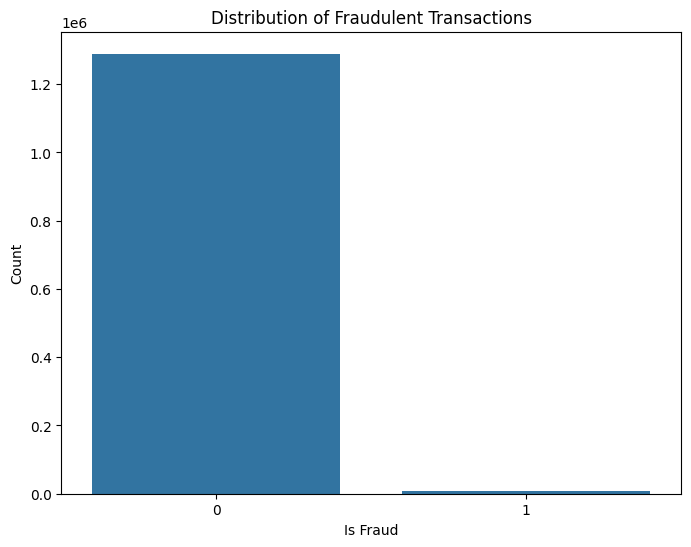

In [21]:
# Visualization of class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='is_fraud', data=train_df)
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()


In [22]:
# Check for missing values
print("Missing Values in Train Data:")
print(train_df.isnull().sum().sum())

Missing Values in Train Data:
0


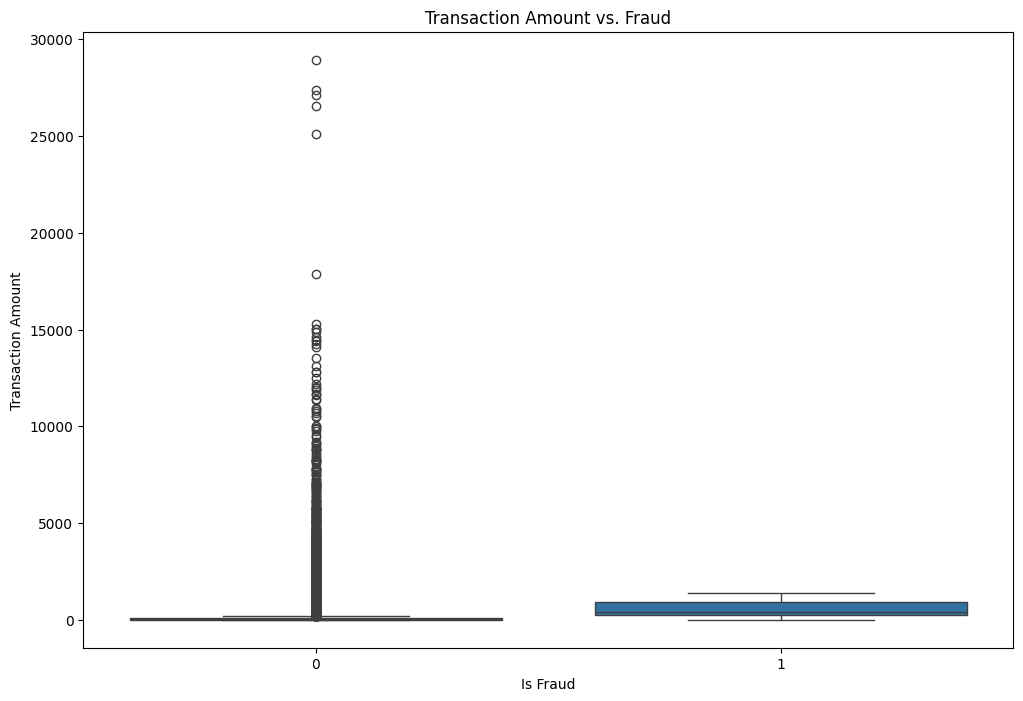

In [23]:
# Visualization of Transaction Amount vs Fraud
plt.figure(figsize=(12, 8))
sns.boxplot(x='is_fraud', y='amt', data=train_df)
plt.title('Transaction Amount vs. Fraud')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Amount')
plt.show()


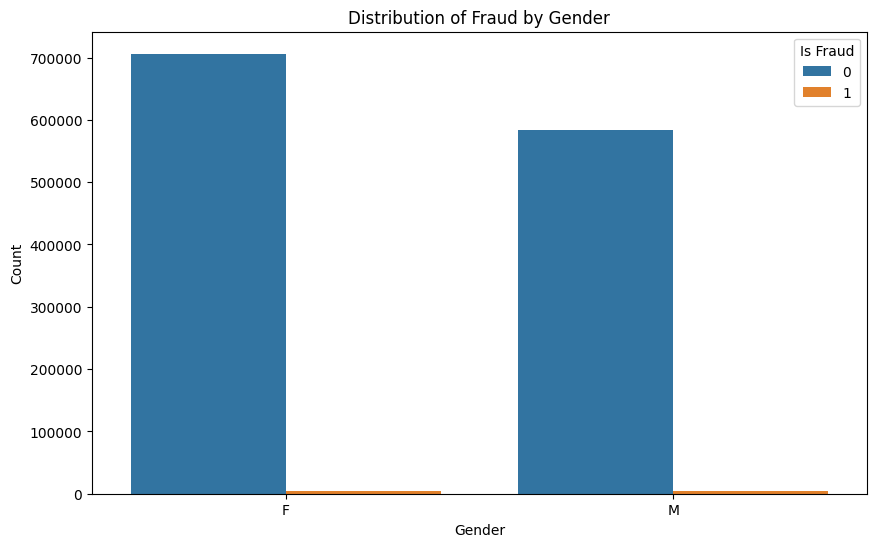

In [24]:
# Exploring Gender vs Fraud
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='is_fraud', data=train_df)
plt.title('Distribution of Fraud by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Is Fraud')
plt.show()

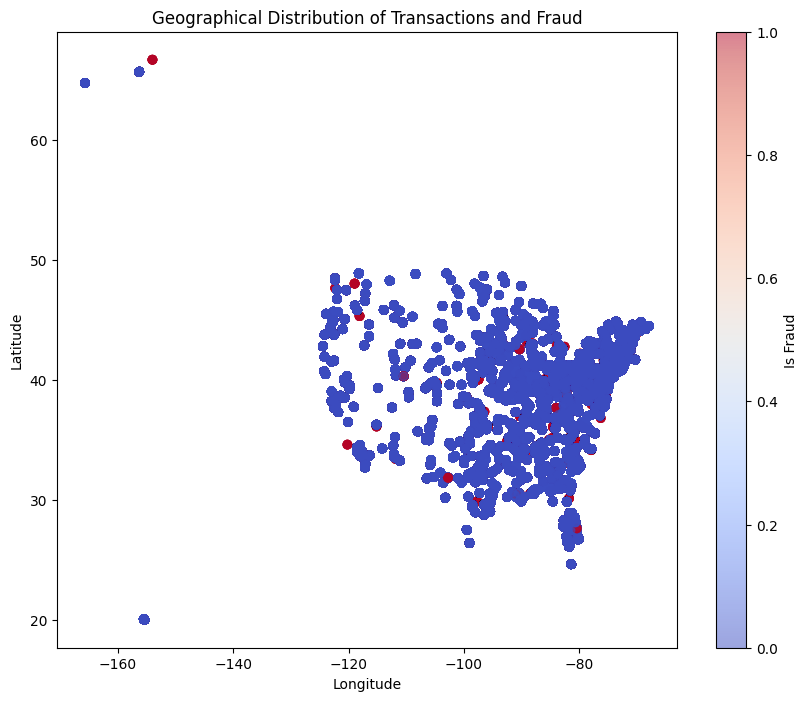

In [25]:
# Geographical distribution of fraud
plt.figure(figsize=(10, 8))
plt.scatter(train_df['long'], train_df['lat'], c=train_df['is_fraud'], cmap='coolwarm', alpha=0.5)
plt.title('Geographical Distribution of Transactions and Fraud')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Is Fraud')
plt.show()


In [26]:
# Dropping unnecessary columns
drop_columns = ['Unnamed: 0', 'cc_num', 'merchant', 'trans_num', 'unix_time', 'first', 'last', 'street', 'zip']
train_df.drop(columns=drop_columns, inplace=True)
test_df.drop(columns=drop_columns, inplace=True)

In [27]:
# Converting date columns
train_df['trans_date_trans_time'] = pd.to_datetime(train_df['trans_date_trans_time'])
train_df['trans_date'] = train_df['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
train_df['trans_date'] = pd.to_datetime(train_df['trans_date'])
train_df['dob'] = pd.to_datetime(train_df['dob'])

test_df['trans_date_trans_time'] = pd.to_datetime(test_df['trans_date_trans_time'])
test_df['trans_date'] = test_df['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
test_df['trans_date'] = pd.to_datetime(test_df['trans_date'])
test_df['dob'] = pd.to_datetime(test_df['dob'])

In [28]:
# Dropping more columns
drop_columns = ['trans_date_trans_time', 'city', 'lat', 'long', 'job', 'dob', 'merch_lat', 'merch_long', 'trans_date', 'state']
train_df.drop(columns=drop_columns, inplace=True)
test_df.drop(columns=drop_columns, inplace=True)

In [29]:
# Gender encoding
train_df.gender = train_df.gender.apply(lambda x: 1 if x == "M" else 0)
test_df.gender = test_df.gender.apply(lambda x: 1 if x == "M" else 0)

In [30]:
# One-hot encoding for 'category'
train_df = pd.get_dummies(train_df, columns=['category'], prefix='category')
test_df = pd.get_dummies(test_df, columns=['category'], prefix='category')

In [31]:
# Ensure test set has the same columns as the training set
test_df = test_df.reindex(columns=train_df.columns, fill_value=0)

In [32]:
# Splitting into features and target
X_train = train_df.drop('is_fraud', axis=1)
y_train = train_df['is_fraud']
X_test = test_df.drop('is_fraud', axis=1)
y_test = test_df['is_fraud']

In [33]:
# Oversample using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [34]:
# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
# Training the  Decision Tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [36]:
# Making predictions 
y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.44      0.67      0.53      2145

    accuracy                           1.00    555719
   macro avg       0.72      0.83      0.76    555719
weighted avg       1.00      1.00      1.00    555719

